<a href="https://colab.research.google.com/github/NehaFathimas/DataAnalyticsProjects/blob/main/ClimatechangeData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

**Upload & Load Dataset**

In [ ]:
df = pd.read_csv("Climate_Change_Extended_Dataset.csv")
df.head()

,Year,Country,CO2_Emissions (kt),AvgTemp (°C),Sea_Level (mm),Forest_Area (%),GHG_Emissions (kt)
0,2000,India,3642584,23.77,3.65,25.85,6965560
1,2001,India,3659123,23.79,3.71,25.75,7035658
2,2002,India,3689270,23.86,3.82,25.66,7019914
3,2003,India,3672926,23.86,4.15,25.61,7070233
4,2004,India,3838124,23.97,3.89,25.07,7180092


In [ ]:
df.shape

(126, 7)

In [ ]:
df.columns

Index(['Year', 'Country', 'CO2_Emissions (kt)', 'AvgTemp (°C)',
       'Sea_Level (mm)', 'Forest_Area (%)', 'GHG_Emissions (kt)'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                126 non-null    int64  
 1   Country             126 non-null    object 
 2   CO2_Emissions (kt)  126 non-null    int64  
 3   AvgTemp (°C)        126 non-null    float64
 4   Sea_Level (mm)      126 non-null    float64
 5   Forest_Area (%)     126 non-null    float64
 6   GHG_Emissions (kt)  126 non-null    int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 7.0+ KB


In [ ]:
df.describe()

,Year,CO2_Emissions (kt),AvgTemp (°C),Sea_Level (mm),Forest_Area (%),GHG_Emissions (kt)
count,126.000000,1.260000e+02,126.000000,126.000000,126.000000,1.260000e+02
mean,2010.000000,4.070896e+06,17.246746,4.856746,31.971429,4.925507e+06
std,6.079474,1.393022e+06,4.701682,1.106636,5.237484,1.815057e+06
min,2000.000000,1.768590e+06,10.110000,2.830000,22.390000,2.038610e+06
25%,2005.000000,2.516255e+06,13.112500,4.042500,28.722500,2.869866e+06
50%,2010.000000,4.732743e+06,17.475000,4.600000,30.850000,5.298833e+06
75%,2015.000000,5.321024e+06,21.075000,5.765000,37.797500,6.225549e+06
max,2020.000000,6.076446e+06,24.680000,7.600000,40.200000,8.328500e+06


In [ ]:
df.isnull().sum()

,0
Year,0
Country,0
CO2_Emissions (kt),0
AvgTemp (°C),0
Sea_Level (mm),0
Forest_Area (%),0
GHG_Emissions (kt),0


**Data Visualization (EDA)**

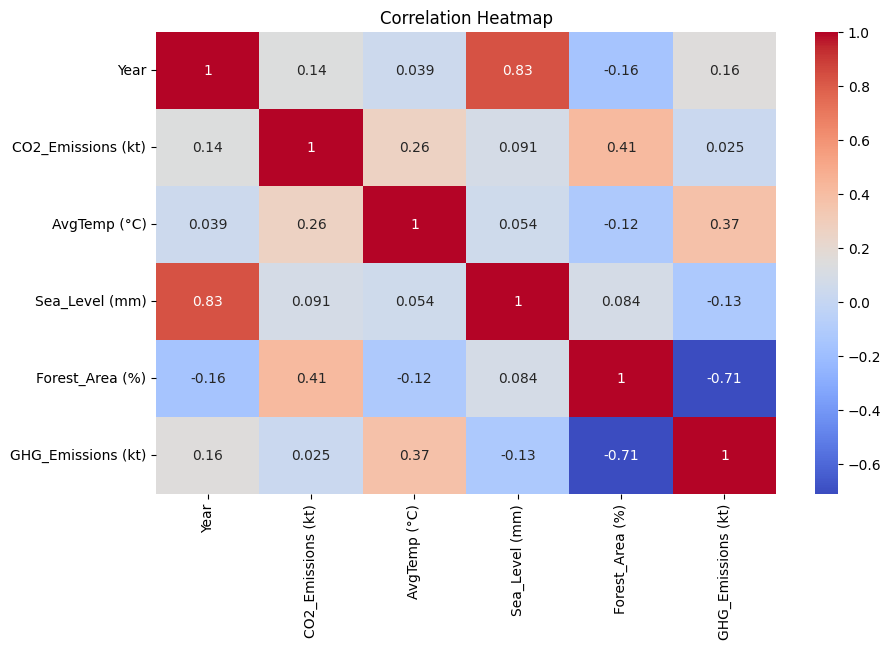

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

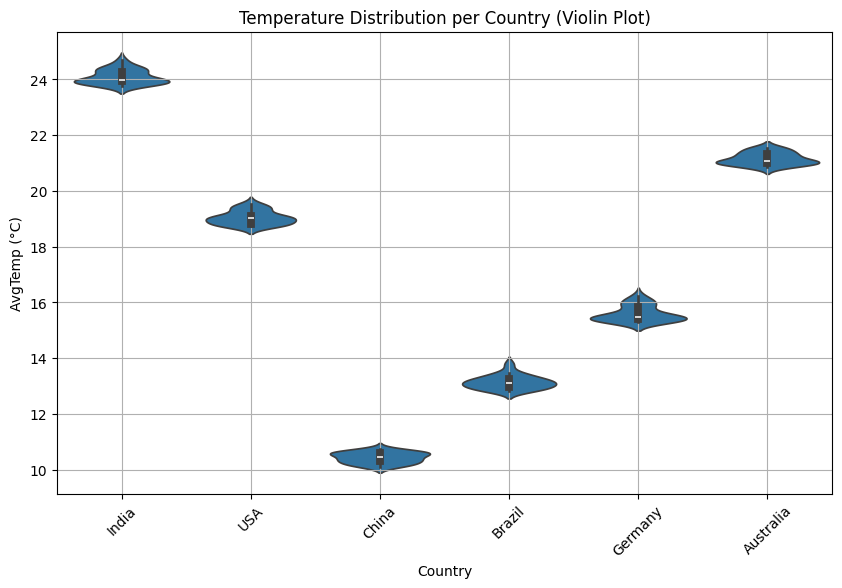

In [ ]:
plt.figure(figsize=(10,6))
sns.violinplot(data=df, x="Country", y="AvgTemp (°C)")
plt.title("Temperature Distribution per Country (Violin Plot)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

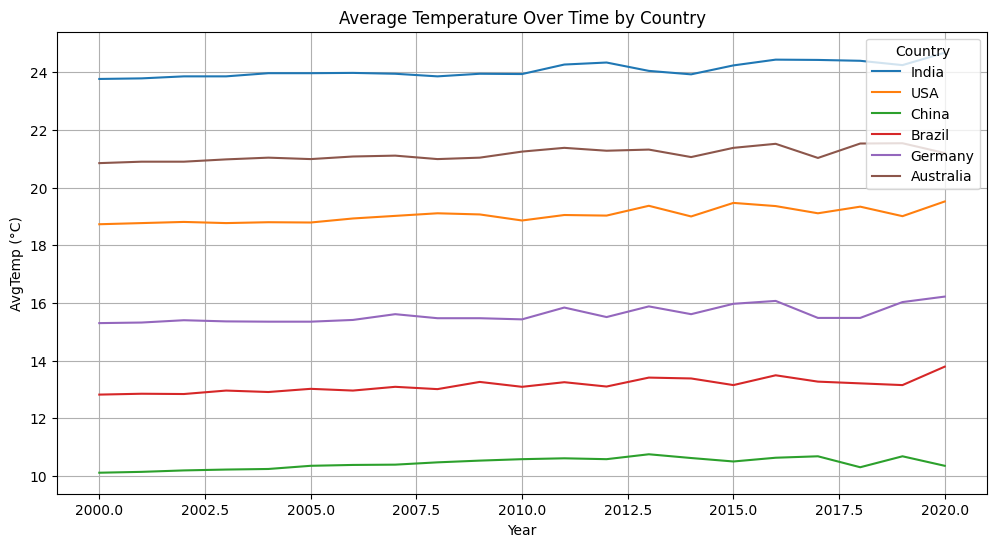

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='Year', y='AvgTemp (°C)', hue='Country')
plt.title("Average Temperature Over Time by Country")
plt.grid(True)
plt.show()

In [ ]:
df['Country_Code'] = df['Country'].astype('category').cat.codes
df.head()

,Year,Country,CO2_Emissions (kt),AvgTemp (°C),Sea_Level (mm),Forest_Area (%),GHG_Emissions (kt),Country_Code
0,2000,India,3642584,23.77,3.65,25.85,6965560,4
1,2001,India,3659123,23.79,3.71,25.75,7035658,4
2,2002,India,3689270,23.86,3.82,25.66,7019914,4
3,2003,India,3672926,23.86,4.15,25.61,7070233,4
4,2004,India,3838124,23.97,3.89,25.07,7180092,4


In [ ]:
X = df.drop(['AvgTemp (°C)', 'Country'], axis=1)
y = df['AvgTemp (°C)']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)


In [ ]:
print("R² Score:", round(r2, 4))
print("Mean Squared Error:", round(mse, 4))

R² Score: 0.9866
Mean Squared Error: 0.3345


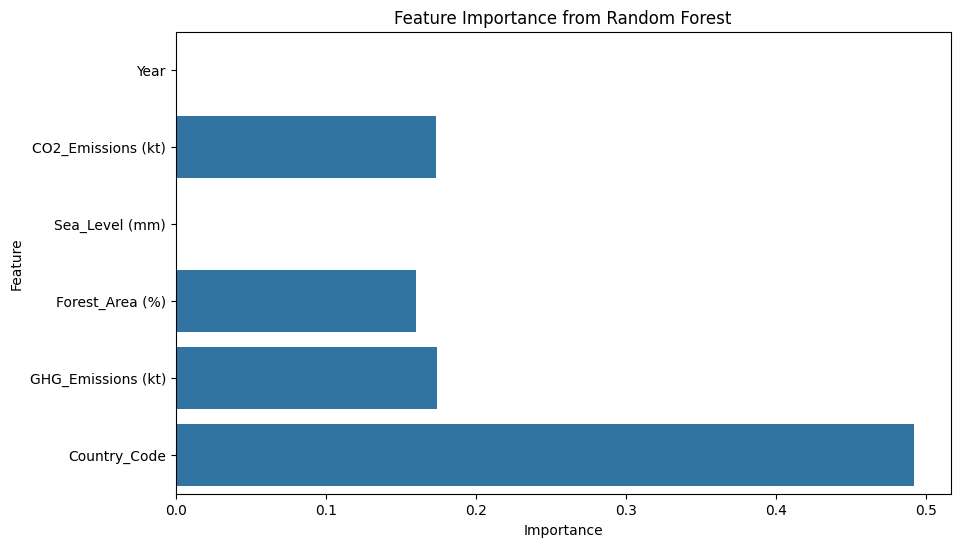

In [ ]:
importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

In [ ]:
X_test['Actual_Temp'] = y_test
X_test['Predicted_Temp'] = y_pred

In [ ]:
from google.colab import files
df.to_csv('Climate_Change_Dataset.csv', index=False)  # Save DataFrame to CSV
files.download('Climate_Change_Dataset.csv')          # Download the file


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>